In [2]:
import pandas as pd # Importa a lib pandas. Essa lib é usada para lidar com DataFrames (Tabelas)

import numpy as np # Trabalhar com matrizes e vetores
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict # Empregados para dividir o dataset
from sklearn.svm import SVC # importa o algoritmo SVM para ser utilizado como classificador
from sklearn import tree # importa o algoritmo arvore de decisão
from sklearn.linear_model import LogisticRegression # Importa o algoritmo de regressão logística
from sklearn.metrics import mean_absolute_error # utilizada para o calculo do MAE
from sklearn.metrics import mean_squared_error # utilizada para o calculo do MSE
from sklearn import metrics # utilizada para as métricas de comparação entre os métodos
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier # Classificador via floresta randômica
from sklearn.tree import DecisionTreeClassifier # Classificador via arvore de decisão
from sklearn.neighbors import KNeighborsClassifier # Classificador via vizinhos mais próximos

In [3]:
got_dataset = pd.read_csv("../input/game-of-thrones/character-predictions.csv") #Leitura do Dataset

In [4]:
pd.set_option("display.max_columns", None) # Utilizado para mostrar toda a tabela
got_dataset.head() # Exibindo o dataset

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [5]:
got_dataset.info() # Informações sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse             276 non-null    object 
 16  book1              1946 

In [6]:
nans = got_dataset.isna().sum() # Verificando valores nulos e fazendo a soma deles.
nans[nans>0]

title            1008
culture          1269
dateOfBirth      1513
DateoFdeath      1502
mother           1925
father           1920
heir             1923
house             427
spouse           1670
isAliveMother    1925
isAliveFather    1920
isAliveHeir      1923
isAliveSpouse    1670
age              1513
dtype: int64

In [7]:
# Conhecendo o DataSet - Idade com problema
got_dataset.describe()

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.745632,0.687050,0.634470,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.435617,0.463813,0.312637,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,0.000000,0.391250,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,1.000000,0.735500,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,1.000000,0.899000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# Analisando os dados nulos
print(got_dataset["age"].mean()) # Possível erro no nosso dataset (Média negativa para a idade?)

-1293.5635103926097


In [9]:
# Analise do dataset
print(got_dataset["name"][got_dataset["age"] <0 ]) 
print(got_dataset["age"][got_dataset["age"] <0 ]) 

1684    Doreah
1868    Rhaego
Name: name, dtype: object
1684   -277980.0
1868   -298001.0
Name: age, dtype: float64


In [10]:
# Substituindo valores negativos
got_dataset.loc[1684, "age"] = 25.0
got_dataset.loc[1868, "age"] = 0.0

In [11]:
print(got_dataset["age"].mean()) # verificando novamente idade

36.70438799076212


# Tratando valores nulos

In [12]:
# trabalhando com dados nulos
got_dataset["age"].fillna(got_dataset["age"].mean(), inplace = True) # Substituindo os valores nulos pelas média da coluna
got_dataset["culture"].fillna("", inplace = True) # Preenchendo os valores nulos da coluna cultura com uma string nula

# Preenchendo os demais valores com -1
got_dataset.fillna(value = -1, inplace = True )

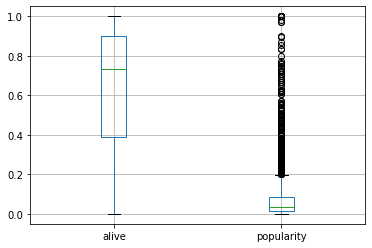

In [13]:
# Realizando boxplot
got_dataset.boxplot(["alive","popularity"])

In [16]:
# Retirando algumas colunas
drop = ["S.No", "pred", "alive", "plod", "name", "isAlive", "DateoFdeath"]
got_dataset.drop(drop, inplace = True, axis = 1)

# Salvando uma cópia do dataset para aplicar o hotencoder
got_dataset_2 = got_dataset.copy(deep = True)

# Trabalhando com dados categóricos

In [17]:
# Transformando os dados categóricos em one-hot-encoder
got_dataset = pd.get_dummies(got_dataset)

In [18]:
got_dataset.head()

,actual,male,dateOfBirth,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,title_-1,title_Acorn Hall,title_Andals,title_Arbor,title_Archmaester,title_Ashford,title_Banefort,title_Barrowton,title_Bear Island,title_Big BucketThe Wull,title_Bitterbridge,title_Black Wind,title_Blackcrown,title_Blackmont,title_Blacktyde,title_Bloodrider,title_Blue Grace,title_Brightwater,title_Broad Arch,title_Brother,title_BrotherProctor,title_Captain,title_Captain of the guard,title_Captain-General,title_Castellan,title_Castellan of Harrenhal,title_CastellanCommander,title_Casterly Rock,title_Castle Lychester,title_Cerwyn,title_Chief Undergaoler,title_Claw Isle,title_Cobblecat,title_Coldmoat,title_Coldwater Burn,title_Commander of the City Watch,title_Commander of the Second Sons,title_Crag,title_Crakehall,title_Cupbearer,title_Darry,title_Deepwood Motte,title_Dragonstone,title_Dreadfort,title_Duskendale,title_Dyre Den,title_Eastwatch-by-the-Sea,title_Eyrie,title_Fair Isle,title_Feastfires,title_Felwood,title_First Builder,title_First Ranger,title_First Sword of Braavos,title_Foamdrinker,title_Ghost Hill,title_Godsgrace,title_Godswife,title_Golden Storm,title_Golden Tooth,title_Goldengrove,title_Goldgrass,title_Good Master,title_Goodman,title_Goodwife,title_Grand Maester,title_Grassy Vale,title_Green Grace,title_Greenshield,title_Greenstone,title_Grey Glen,title_Greywater Watch,title_Gulltown,title_Hand of the King,title_Harlaw,title_Harrenhal,title_Harridan Hill,title_Hayford,title_Haystack Hall,title_Heart's Home,title_High Septon,title_High Steward of Highgarden,title_Highgarden,title_Hightower,title_Horn Hill,title_Hornvale,title_Hornwood,title_Iron Islands,title_Ironoaks,title_Karhold,title_Karl's Hold,title_Kayce,title_Keeper of the Gates of the Moon,title_Khal,title_KhalKo (formerly),title_Khalakka,title_King,title_King in the North,title_King of Astapor,title_King of Winter,title_King of the Andals,title_King of the Iron Islands,title_King-Beyond-the-Wall,title_Knight,title_Knight of Griffin's Roost,title_Lady,title_Lady Marya,title_Lady of Bear Island,title_Lady of Darry,title_Lady of Torrhen's Square,title_Lady of the Leaves,title_Lady of the Vale,title_LadyQueen,title_LadyQueenDowager Queen,title_Last Hearth,title_Light of the West,title_Lonely Light,title_Longbow Hall,title_Longsister,title_Longtable,title_Lord,title_Lord Captain of the Iron Fleet,title_Lord Commander of the Night's Watch,title_Lord Paramount of the Mander,title_Lord Paramount of the Stormlands,title_Lord Paramount of the Trident,title_Lord Reaper of Pyke,title_Lord Seneschal,title_Lord Steward,title_Lord Steward of the Iron Islands,title_Lord of Atranta,title_Lord of Blackhaven,title_Lord of Coldmoat,title_Lord of Crows Nest,title_Lord of Darry,title_Lord of Dragonstone,title_Lord of Flint's Finger,title_Lord of Greyshield,title_Lord of Griffin's Roost,title_Lord of Hammerhorn,title_Lord of Harrenhal,title_Lord of Hellholt,title_Lord of Honeyholt,title_Lord of Iron Holt,title_Lord of Kingsgrave,title_Lord of Oakenshield,title_Lord of Oldcastle,title_Lord of Pebbleton,title_Lord of Southshield,title_Lord of Starfall,title_Lord of Sunflower Hall,title_Lord of White Harbor,title_Lord of the Crossing,title_Lord of the Deep Den,title_Lord of the Hornwood,title_Lord of the Iron Islands,title_Lord of the Marches,title_Lord of the Red Dunes,title_Lord of the Seven Kingdoms,title_Lord of the Snakewood,title_Lord of the Ten TowersLord Harlaw of HarlawHarlaw of Harlaw,title_Lord of the Tides,title_Lord of the Tor,title_LordWisdom,title_Lordsport,title_Maester,title_Magister,title_Magister of Pentos,title_Magnar of Thenn,title_Maidenpool,title_Master of Coin,title_Master of Deepwood Motte,title_Master of Harlaw Hall,title_Master of Whisperers,title_Master of coin,title_Master of whisperers,title_Master-at-Arms,title_Mistress of whisperers,title_Nightsong,title_Oakenshi

In [20]:
got_dataset.shape

(1946, 1012)

In [21]:
# Separando o dataset entre entradas e saídas
x = got_dataset.iloc[:,1:].values
y = got_dataset.iloc[:, 0].values

# Incluindo a construção do pipeline no algoritmo

In [23]:
# Separando os dados para a aplicação do modelo de validação cruzada
# divide o dataset entre 5 diferentes tipos
kfold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [24]:
print(kfold.get_n_splits())

5


In [25]:
# Construindo os modelos de classificação
modelos = [LogisticRegression(solver = "liblinear"), RandomForestClassifier(n_estimators = 400, random_state = 42),
          DecisionTreeClassifier(random_state = 42), SVC(kernel = "linear", gamma = "scale", random_state = 42),
          KNeighborsClassifier()]

In [26]:
# utilizando a validação cruzada
mean = []
std = []
for model in modelos:
    result = cross_val_score(model, x, y, cv = kfold, scoring = "accuracy", n_jobs = 1)
    mean.append(result)
    std.append(result)

([], <a list of 0 Text major ticklabel objects>)

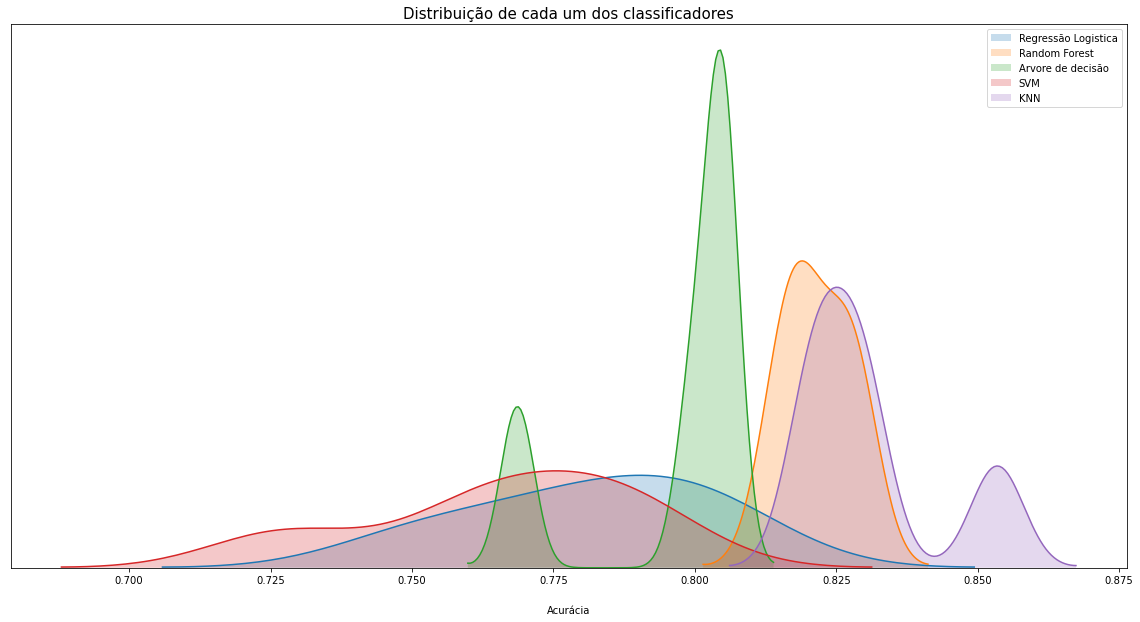

In [28]:
classificadores = ["Regressão Logistica", "Random Forest", "Arvore de decisão", "SVM", "KNN"]

plt.figure(figsize = (20,10))
for i in range(len(mean)):
    sns.distplot(mean[i], hist = False, kde_kws = {"shade": True})
    
plt.title("Distribuição de cada um dos classificadores", fontsize = 15)
plt.legend(classificadores)
plt.xlabel("Acurácia", labelpad = 20)
plt.yticks([])

# Algoritmos selecionados : RandomForest e SVM

In [36]:
# Dividindo o dataset entre treinamento 80% e teste 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, shuffle = True, random_state = 42)

In [37]:
# Escolhendo o SVM e a floresta randômica
svm_clf = SVC(C= 0.9, gamma = 0.1, kernel = "linear", probability = True, random_state = 42)
rf_clf =  RandomForestClassifier(n_estimators = 400, n_jobs = 1,random_state = 42)

# Treina os modelos
svm_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=400, n_jobs=1, random_state=42)

In [38]:
# Obtém as probabilidades previstas
svm_prob = svm_clf.predict_proba(x_test)
rf_prob = rf_clf.predict_proba(x_test)

# Valores reais
svm_preds = np.argmax(svm_prob, axis = 1)
rf_preds = np.argmax(rf_prob, axis = 1)

AttributeError: module 'pandas' has no attribute 'Dataframe'

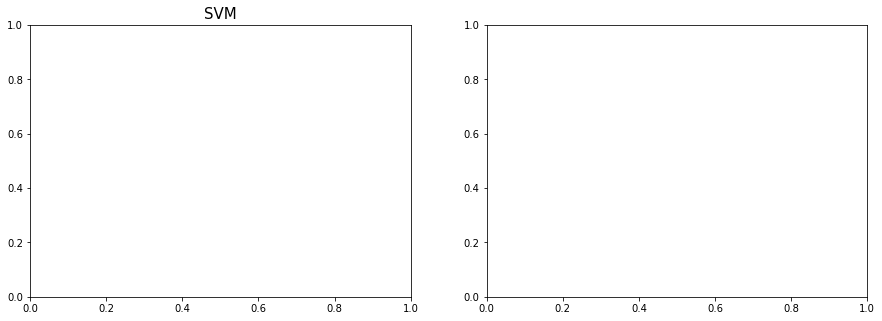

In [42]:
# Analisando os modelos
cm = metrics.confusion_matrix(y_test, svm_preds)
cm = cm.astype("float")/cm.sum(axis = 1)[:, np.newaxis]
cm2 = metrics.confusion_matrix(y_test, rf_preds)
cm2 = cm2.astype("float")/cm2.sum(axis = 1)[:, np.newaxis]

classes = ["Morto", "Vivo"]
f, ax = plt.subplots(1,2, figsize = (15,5))
ax[0].set_title("SVM", fontsize = 15.)
sns.heatmap(pd.DataFrame(cm, index = classes, columns = classes),
           cmap = "winter", annot = True, fmt = ".2f", ax = ax[0]).set(xlabel= "Previsão", ylabel= "Valor Real")

ax[1].set_title("Random Forest", fontsize = 15.)
sns.heatmap(pd.DataFrame(cm2, index = classes, columns = classes),
           cmap = "winter", annot = True, fmt = ".2f", ax = ax[1]).set(xlabel= "Previsão", ylabel= "Valor Real")